In [20]:
%matplotlib inline
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from nnfs.datasets import spiral_data

# Intro
Neural networks comprise of layers of neurons and connections between the neurons of each layer. Tuning the weights and biases of these connections allow the network to "learn" and predict.

# Neuron code
Suppose we are looking at a single neuron taking in 3 inputs from the previous layer. The following is a simplified look at what a neuron does. It takes a weighted sum of its inputs and adds the bias associated with the neuron. The result of this calculation is output of the neuron.

In [21]:
inputs = [1, 2, 3] # Output of previous layer's neurons (could be from an actual input layer or a hidden layer)
weights = [0.2, 0.8, -0.5] # Strength of connection between the previous layer's neurons
bias = 2 # Bias associated with this particular neuron

output = inputs[0]*weights[0] + inputs[1]*weights[1] + inputs[2]*weights[2] + bias
print(output)

2.3


# Layer Code
Now suppose we are are looking at a single layer consisting of 3 neurons taking inputs from a previous layer of 4 neurons. This time there would be 3 sets of weights as well as 3 biases.

In [22]:
inputs = [1, 2, 3, 2.5]
weights1 = [0.2, 0.8, -0.5, 1.0]
weights2 = [0.5, -0.91, 0.26, -0.5]
weights3 = [-0.26, -0.27, 0.17, 0.87]

bias1 = 2
bias2 = 3
bias3 = 0.5

output = [inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + inputs[3]*weights1[3] + bias1,
		  inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + inputs[3]*weights2[3] + bias2,
		  inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + inputs[3]*weights3[3] + bias3]
print(output)

[4.8, 1.21, 2.385]


# Numpy and Dot Product
To make things faster and more concise, we can use the numpy's dot product function.

In [23]:
inputs = [1, 2, 3, 2.5]
weights = [[0.2, 0.8, -0.5, 1.0],
		   [0.5, -0.91, 0.26, -0.5],
		   [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]

output = np.dot(weights, inputs) + biases
print(output)

[4.8   1.21  2.385]


# Batching
Now consider instead of passing a single input at time, we wish to pass a batch of inputs. Doing this allows us to reduce computation time. The following code details how the output is calculated for a batch of 3 inputs

In [24]:
inputs = [[1, 2, 3, 2.5],
		  [2.0, 5.0, -1.0, 2.0],
		  [-1.5, 2.7, 3.3, -0.8]]
weights = [[0.2, 0.8, -0.5, 1.0],
		   [0.5, -0.91, 0.26, -0.5],
		   [-0.26, -0.27, 0.17, 0.87]]
biases = [2, 3, 0.5]
output = np.dot(inputs, np.array(weights).T) + biases
print(output)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


# OOP
Now consider that we wish to add more layers of neurons. The simplest way would be to type out another set of weights and biases but this can be quite restricting when we want to modify the neural network. Thus, we'll be abstracting neurons and layers into classes

## Layer

In [25]:
class Layer_Dense:
	def __init__(self, n_inputs, n_neurons):
		# Randomly initialise weights to be a small number 
		self.weight = 0.10*np.random.randn(n_inputs, n_neurons)
		self.biases = np.zeros((1, n_neurons))
	def forward(self, inputs):
		self.output = np.dot(inputs, self.weight) + self.biases

**Note**: here we set initial biases to be zeros but this can sometimes cause zeros to propagate through the network, resulting in a "dead" network. Hence we should consider initial biases when creating/tuning a network.

With our dense layer abstracted, we can now make and use multiple layers as follows:

In [26]:
# Inputs
X = [[1, 2, 3, 2.5],
	[2.0, 5.0, -1.0, 2.0],
	[-1.5, 2.7, 3.3, -0.8]]

layer1 = Layer_Dense(4, 5)
layer2 = Layer_Dense(5,2)

layer1.forward(X)
layer2.forward(layer1.output)

print(layer1.output)
print(layer2.output)

[[ 0.5594736  -0.12346543 -0.27237936 -0.87588405  0.22051304]
 [ 0.28065775 -0.15663613 -0.93009513 -0.45087583  0.42214403]
 [ 0.05614457 -0.20039359  0.09130433 -0.6521065  -0.60439449]]
[[ 0.01290147  0.04885608]
 [ 0.02718514 -0.0435932 ]
 [ 0.1340947   0.12693194]]


# Activation Functions
Activation functions allow the network to better fit the data. The layer class that we have used so far is considered to be using the idenity activation function, `f(x) = x`. However, to solve more difficult problems we require nonlinear activation functions. Some common/popular nonlinear activation functions include the sigmoid function and the rectified linear unit.

## Rectified Linear Unit (ReLU)
The ReLU activation function returns `f(x) = x` for `x > 0` and `f(x) = 0` for `x<=0` 

In [27]:
class Activation_ReLU:
	def forward(self, inputs):
		self.output = np.maximum(0, inputs)

The activation function can then be used as follows:

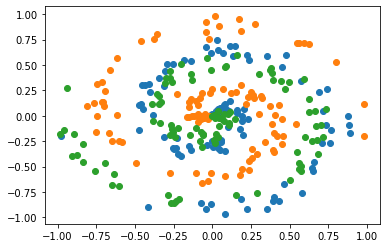

In [28]:
# 100 feature sets of 3 classes (each feature set containing 2 features (x,y))
X,y = spiral_data(100, 3)
plt.plot(X[y==0,0], X[y==0,1], 'o')
plt.plot(X[y==1,0], X[y==1,1], 'o')
plt.plot(X[y==2,0], X[y==2,1], 'o')

In [29]:
layer1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()

layer1.forward(X)
activation1.forward(layer1.output)

print(activation1.output)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.0023381  0.         0.        ]
 [0.         0.         0.00531102 0.00044745 0.        ]
 ...
 [0.02531792 0.         0.09502482 0.         0.        ]
 [0.12169406 0.02798662 0.         0.         0.00943619]
 [0.09482336 0.         0.         0.         0.        ]]


**Note**: here we see that there are no negative values and many values have been set to zero as expected of the ReLU function. However, if we find that the network is "dying", it could mean that our initial biases may need to be tweaked.

## Softmax
The softmax function exponentiates inputs and normalises and returns this calculation as output.

In [30]:
class Activation_Softmax:
	def forward(self, inputs):
		# max input value is subtracted to avoid overflow 
		exp_val = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
		probabilities = exp_val / np.sum(exp_val, axis=1, keepdims=True)
		self.output = probabilities

The softmax layer can then be used as follows:

In [31]:
X,y = spiral_data(100, 3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.33336691 0.33332359 0.3333095 ]
 [0.33340474 0.33330657 0.33328869]
 [0.33333333 0.33333333 0.33333333]
 [0.33345963 0.33330371 0.33323666]]


This uniform output of approximately `1/3` is expected for a randomly initialised network with three output neurons

# Loss Functions
Before we are able to train our model, we need a way to tell how wrong the model is. We could try to train purely on the data labels but that would be throwing away a lot of potentially useful information that the optimiser can use.

## Categorical Cross Entropy

In [32]:
# Suppose we have the following output from a softmax layer
softmax_output = [0.7, 0.1, 0.2]
# Suppose the target class for this sample was
target_output = 0
# With one-hot encoding, this becomes
target_output = [1, 0, 0]
# Loss is then given as follows
loss = -(math.log(softmax_output[0])*target_output[0] +
         math.log(softmax_output[1])*target_output[1] +
		 math.log(softmax_output[2])*target_output[2]
		)
# Due to one-hot encoding, the simplifies to
loss = -math.log(softmax_output[0])
print(loss)

0.35667494393873245


Now we can abstract this example to make our loss function

In [33]:
class Loss:
	def calculate(self, output, y):
		sample_losses = self.forward(output, y)
		data_loss = np.mean(sample_losses)
		return data_loss

class Loss_CategoricalCrossEntropy(Loss):
	def forward(self, y_pred, y_true):
		samples = len(y_pred)
		y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

		if len(y_true.shape) == 1: # Scalar values
			correct_confidences = y_pred_clipped[range(samples), y_true]
		elif len(y_true.shape) == 2: # One-hot encoded
			correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
		
		neg_log_likelihoods = -np.log(correct_confidences)
		return neg_log_likelihoods


Using loss

In [34]:
X,y = spiral_data(100, 3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss_func = Loss_CategoricalCrossEntropy()
loss = loss_func.calculate(activation2.output, y)

print(activation2.output[:5])
print(loss)

[[0.33333333 0.33333333 0.33333333]
 [0.33335769 0.33335592 0.33328639]
 [0.33341569 0.33336488 0.33321943]
 [0.33345965 0.333385   0.33315535]
 [0.33349562 0.33339313 0.33311125]]
1.0983040562422333
